# Bagging

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [29]:
# Import dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
df.shape

(53940, 10)

# 

In [32]:
# Encode the categorical columns
labelencoder = LabelEncoder()
df['cut'] = labelencoder.fit_transform(df['cut'])
df['color'] = labelencoder.fit_transform(df['color'])
df['clarity'] = labelencoder.fit_transform(df['clarity'])

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [34]:
# Define X and y
X = df.drop('cut', axis=1)
y = df['cut']

In [35]:
# Spilt the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
%%time
# Train the decision tree classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the test data
y_pred = dt.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.71412680756396
Confusion Matrix: [[ 291   30    3    6    5]
 [  35  696   18   32  223]
 [   4   25 3405  337  521]
 [   8   55  325 2019  368]
 [   7  247  482  353 1293]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86       335
           1       0.66      0.69      0.68      1004
           2       0.80      0.79      0.80      4292
           3       0.73      0.73      0.73      2775
           4       0.54      0.54      0.54      2382

    accuracy                           0.71     10788
   macro avg       0.72      0.73      0.72     10788
weighted avg       0.72      0.71      0.71     10788

CPU times: total: 531 ms
Wall time: 513 ms


In [37]:
%%time
# Train the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.7860585836114201
Confusion Matrix: [[ 302   19    3    7    4]
 [  22  710   20   42  210]
 [   2   13 3938  165  174]
 [   1   13  305 2255  201]
 [   4  145  501  457 1275]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.90      0.91       335
           1       0.79      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.68      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.77      0.78     10788
weighted avg       0.78      0.79      0.78     10788

CPU times: total: 10.7 s
Wall time: 10.8 s


In [38]:
%%time
# Train the XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict the test data
y_pred = xgb.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.8056173526140156
Confusion Matrix: [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788

CPU times: total: 7.16 s
Wall time: 1.74 s


Text(0, 0.5, 'Accuracy')

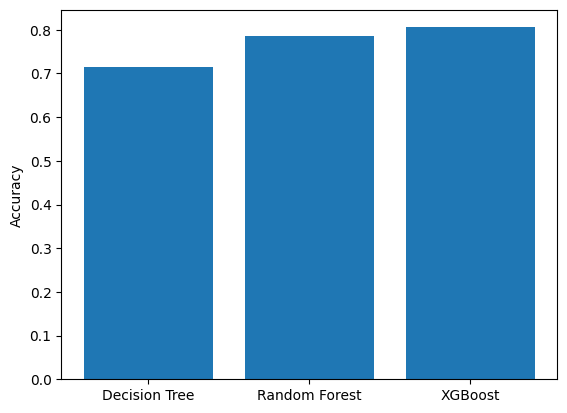

In [39]:
# Make a bar plot of the model vs accuracy
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [accuracy_score(y_test, dt.predict(X_test)), accuracy_score(y_test, rf.predict(X_test)), accuracy_score(y_test, xgb.predict(X_test))]
plt.bar(models, accuracy)
plt.ylabel('Accuracy')